# Ensemble Learning

1. Can we use Bagging for regression problems?
   - Yes, bagging can be used for regression problems. In regression, bagging trains multiple models (often decision trees) on different bootstrap samples of the data.

2. What is the difference between multiple model training and single model training?
   - **Single Model Training:** Single model training involves training one model on the entire dataset to make predictions. It is simpler, faster, and easier to interpret but may suffer from higher bias or variance.

      **Multiple Model Training:** Multiple model training (ensemble learning) trains several models and combines their outputs (e.g., voting or averaging). This improves accuracy and robustness by reducing errors of individual models, at the cost of higher computation.

3.  Explain the concept of feature randomness in Random Forest.
    - Feature randomness in Random Forest means that, at each split of a decision tree, only a random subset of features is considered instead of all features. This introduces diversity among trees and reduces correlation between them.

4. What is OOB (Out-of-Bag) Score?
    -   Out-of-Bag (OOB) score is an internal validation method used in bagging-based models like Random Forest. Each tree is trained on a bootstrap sample, leaving about one-third of the data as out-of-bag samples.

5. How can you measure the importance of features in a Random Forest model?
   -   Feature importance in a Random Forest shows how much each feature contributes to predictions. It can be measured using mean decrease in impurity (how much a feature reduces tree impurity) or permutation importance (drop in performance when the feature is shuffled). Scikit-learn provides a built-in feature_importances_ attribute to access these scores easily.

6. Explain the working principle of a Bagging Classifier.
   -   A Bagging Classifier works by training multiple base models (usually decision trees) on different bootstrap samples of the training data. Each model makes predictions independently, and the final output is obtained by majority voting (for classification) or averaging (for regression). This reduces variance and overfitting, improving overall model stability and accuracy.

7. How do you evaluate a Bagging Classifier's performance?
   -   A Bagging Classifier's performance can be evaluated using standard classification metrics such as:

        **Accuracy:** Overall correctness of predictions.
        
        **Precision, Recall, F1-score:** Especially important for imbalanced classes.
        
        **Confusion Matrix:** Visualizes correct and incorrect predictions.
        
        **ROC-AUC:** Measures the model's ability to distinguish between classes.

8. How does a Bagging Regressor work?
   -   A Bagging Regressor works by training multiple base regressors (usually decision trees) on different bootstrap samples of the training data. Each model makes its own prediction, and the final output is obtained by averaging the predictions of all models. This reduces variance and overfitting, leading to more stable and accurate regression results.

9.  What is the main advantage of ensemble techniques?
    -   The main advantage of ensemble techniques is that they combine multiple models to improve overall performance. They reduce variance, bias, or both, making predictions more accurate and robust compared to a single model. Ensembles also help handle complex patterns in data that individual models might miss.

10.  What is the main challenge of ensemble methods?
      -   The main challenge of ensemble methods is their increased complexity and computational cost. Training and maintaining multiple models require more time, memory, and resources than a single model. Additionally, ensembles can be harder to interpret, making it difficult to understand individual feature contributions.

11.  Explain the key idea behind ensemble techniques.
      -   The key idea behind ensemble techniques is to combine multiple models to make better predictions than any single model. By aggregating the strengths of several learners, ensembles reduce errors from bias, variance, or noise. This improves overall accuracy, stability, and generalization on unseen data.

12.  What is a Random Forest Classifier?
      -   A Random Forest Classifier is an ensemble learning method that builds multiple decision trees on random subsets of the data and features. Each tree makes a prediction, and the final class is determined by majority voting. It reduces overfitting, improves accuracy, and handles high-dimensional data well.

13.  What are the main types of ensemble techniques?
      -   The main types of ensemble techniques are:

          **1. Bagging (Bootstrap Aggregating):** Trains multiple models on different bootstrap samples and combines their predictions (e.g., Random Forest).
        
          **2. Boosting:** Trains models sequentially, where each model focuses on the errors of the previous ones (e.g., AdaBoost, XGBoost, CatBoost).
        
          **3. Stacking:** Combines predictions of multiple models using a meta-model to make the final prediction.

14.  What is ensemble learning in machine learning?
      -   Ensemble learning is a technique in machine learning where multiple models are combined to make better predictions than any single model. By aggregating the outputs of several learners, it reduces errors from bias, variance, or noise. This leads to improved accuracy, stability, and generalization on unseen data.

15.  When should we avoid using ensemble methods?
      -   We should avoid ensemble methods when computational resources are limited, as they require more memory and processing. They are also not ideal if interpretability is important, since ensembles are harder to explain than single models. On very small datasets, ensembles may overfit instead of improving performance.
        
16.  How does Bagging help in reducing overfitting?
      -   Bagging reduces overfitting by training multiple models on different random subsets of the data and then aggregating their predictions. Since each model sees slightly different data, their errors are less correlated. Averaging (for regression) or majority voting (for classification) smooths out individual mistakes, lowering variance and improving generalization.

17.  Why is Random Forest better than a single Decision Tree?
      -   Random Forest is better than a single Decision Tree because it combines multiple trees to make predictions, which reduces overfitting and improves accuracy. It introduces feature randomness and bootstrap sampling, making the model more robust and stable. Unlike a single tree, it generalizes better to unseen data and handles high-dimensional datasets efficiently.

18.   What is the role of bootstrap sampling in Bagging?
      -   Bootstrap sampling in Bagging involves creating multiple random subsets of the training data with replacement. Each base model is trained on a different subset, ensuring diversity among models. This helps reduce variance and overfitting, improving the ensemble's overall performance.

19.   What are some real-world applications of ensemble techniques?
      -   Some real-world applications of ensemble techniques include:

          **Finance:** Credit scoring and fraud detection using Random Forest or XGBoost.

          **Healthcare:** Disease prediction and medical diagnosis with boosted models.

          **Marketing:** Customer churn prediction and recommendation systems.

          **Computer Vision & NLP:** Image classification, object detection, and sentiment analysis using ensemble models for higher accuracy.

20.   What is the difference between Bagging and Boosting?
      -   The key differences between Bagging and Boosting are:

          *   Bagging trains models in parallel on different bootstrap samples and combines predictions by averaging or voting. It mainly reduces variance.
          *   Boosting trains models sequentially, where each model focuses on the errors of the previous one. It mainly reduces bias.
          *   Bagging is less prone to overfitting, while boosting can achieve higher accuracy but may overfit if not tuned properly.




In [3]:
# Q-21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag_model.fit(X_train, y_train)

y_pred = bag_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)


Bagging Classifier Accuracy: 0.956140350877193


In [7]:
# Q-22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

bag_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)
bag_model.fit(X_train, y_train)

y_pred = bag_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Bagging Regressor MSE:", mse)


Bagging Regressor MSE: 0.2572988359842641


In [6]:
# Q-23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.4f}")


mean radius: 0.0487
mean texture: 0.0136
mean perimeter: 0.0533
mean area: 0.0476
mean smoothness: 0.0073
mean compactness: 0.0139
mean concavity: 0.0680
mean concave points: 0.1062
mean symmetry: 0.0038
mean fractal dimension: 0.0039
radius error: 0.0201
texture error: 0.0047
perimeter error: 0.0113
area error: 0.0224
smoothness error: 0.0043
compactness error: 0.0053
concavity error: 0.0094
concave points error: 0.0035
symmetry error: 0.0040
fractal dimension error: 0.0053
worst radius: 0.0780
worst texture: 0.0217
worst perimeter: 0.0671
worst area: 0.1539
worst smoothness: 0.0106
worst compactness: 0.0203
worst concavity: 0.0318
worst concave points: 0.1447
worst symmetry: 0.0101
worst fractal dimension: 0.0052


In [8]:
# Q-24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Decision Tree MSE:", mse_dt)
print("Random Forest MSE:", mse_rf)

Decision Tree MSE: 0.495235205629094
Random Forest MSE: 0.2553684927247781


In [9]:
# Q-25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target

rf_model = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=42
)
rf_model.fit(X, y)

print("Out-of-Bag (OOB) Score:", rf_model.oob_score_)


Out-of-Bag (OOB) Score: 0.961335676625659


In [10]:
# Q-26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

bag_model = BaggingClassifier(
    estimator=SVC(probability=True, random_state=42),
    n_estimators=10,  # Number of base SVM models
    random_state=42
)
bag_model.fit(X_train, y_train)

y_pred = bag_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier (SVM) Accuracy:", accuracy)


Bagging Classifier (SVM) Accuracy: 0.9473684210526315


In [11]:
# Q-27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_estimators_list = [10, 50, 100, 200]

for n in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Number of Trees: {n}, Accuracy: {accuracy:.4f}")


Number of Trees: 10, Accuracy: 0.9561
Number of Trees: 50, Accuracy: 0.9649
Number of Trees: 100, Accuracy: 0.9649
Number of Trees: 200, Accuracy: 0.9649


In [13]:
# Q-28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

bag_model = BaggingClassifier(
    estimator=LogisticRegression(max_iter=5000, random_state=42),
    n_estimators=10,
    random_state=42
)
bag_model.fit(X_train, y_train)

y_pred_prob = bag_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob)
print("Bagging Classifier (Logistic Regression) AUC Score:", auc)



Bagging Classifier (Logistic Regression) AUC Score: 0.9963969865705864


In [14]:
# Q-29. Train a Random Forest Regressor and analyze feature importance scores.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


In [35]:
# Q-30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)
accuracy_bag = accuracy_score(y_test, y_pred_bag)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Bagging Classifier Accuracy:", accuracy_bag)
print("Random Forest Accuracy:", accuracy_rf)



Bagging Classifier Accuracy: 0.956140350877193
Random Forest Accuracy: 0.9649122807017544


In [17]:
# Q-31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy: 0.9649122807017544


In [19]:
# Q-32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_estimators_list = [5, 10, 20, 50]

for n in n_estimators_list:
    bag_model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    bag_model.fit(X_train, y_train)
    y_pred = bag_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Number of Estimators: {n}, Mean Squared Error: {mse:.4f}")


Number of Estimators: 5, Mean Squared Error: 0.3060
Number of Estimators: 10, Mean Squared Error: 0.2824
Number of Estimators: 20, Mean Squared Error: 0.2643
Number of Estimators: 50, Mean Squared Error: 0.2573


In [22]:
# Q-33. Train a Random Forest Classifier and analyze misclassified samples.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
misclassified_samples = pd.DataFrame(X_test[misclassified_indices], columns=data.feature_names)
misclassified_samples['True_Label'] = y_test[misclassified_indices]
misclassified_samples['Predicted_Label'] = y_pred[misclassified_indices]

print("\nMisclassified Samples:\n", misclassified_samples)

Accuracy: 0.9649122807017544

Confusion Matrix:
 [[40  3]
 [ 1 70]]

Misclassified Samples:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0          0.10780   
1        13.80         15.79           90.43      584.1          0.10070   
2        13.96         17.05           91.43      602.4          0.10960   
3        14.48         21.46           94.25      648.2          0.09444   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.15350         0.11690              0.06987         0.1942   
1           0.12800         0.07789              0.05069         0.1662   
2           0.12790         0.09789              0.05246         0.1908   
3           0.09947         0.12040              0.04938         0.2075   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0                 0.06902  ...            96.66       614.9          

In [23]:
# Q-34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)
accuracy_bag = accuracy_score(y_test, y_pred_bag)

print("Decision Tree Accuracy:", accuracy_dt)
print("Bagging Classifier Accuracy:", accuracy_bag)


Decision Tree Accuracy: 0.9473684210526315
Bagging Classifier Accuracy: 0.956140350877193


Accuracy: 0.9649122807017544


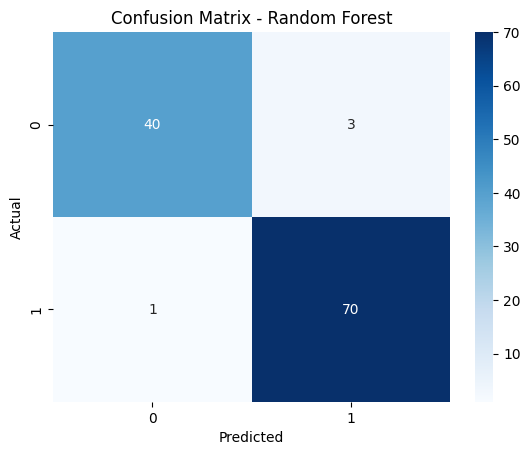

In [24]:
# Q-35. Train a Random Forest Classifier and visualize the confusion matrix.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [25]:
# Q-36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=5000, random_state=42))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=5000, random_state=42)
)
stack_model.fit(X_train, y_train)

y_pred_stack = stack_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print("Stacking Classifier Accuracy:", accuracy_stack)

for name, model in estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Stacking Classifier Accuracy: 0.956140350877193
dt Accuracy: 0.9474
svm Accuracy: 0.9474
lr Accuracy: 0.9561


In [26]:
# Q-37. Train a Random Forest Classifier and print the top 5 most important features.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 5 Important Features:")
print(feature_importance_df.head(5))



Top 5 Important Features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


In [27]:
# Q-38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag_model.fit(X_train, y_train)

y_pred = bag_model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Bagging Classifier Performance:\n")
print(report)


Bagging Classifier Performance:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



max_depth=None, Accuracy=0.9649
max_depth=2, Accuracy=0.9649
max_depth=5, Accuracy=0.9649
max_depth=10, Accuracy=0.9649
max_depth=15, Accuracy=0.9649
max_depth=20, Accuracy=0.9649


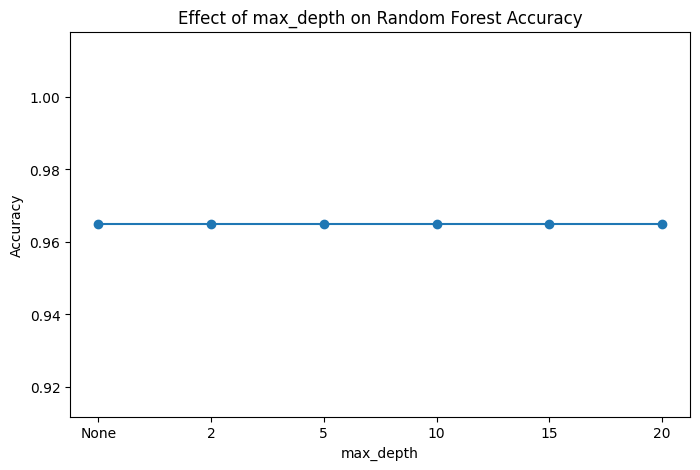

In [28]:
# Q-39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

max_depth_values = [None, 2, 5, 10, 15, 20]

accuracies = []

for depth in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"max_depth={depth}, Accuracy={acc:.4f}")

plt.figure(figsize=(8,5))
plt.plot([str(d) for d in max_depth_values], accuracies, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.show()


In [29]:
# Q-40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

estimators = {
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

for name, estimator in estimators.items():
    bag_model = BaggingRegressor(
        estimator=estimator,
        n_estimators=50,
        random_state=42
    )
    bag_model.fit(X_train, y_train)
    y_pred = bag_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bagging Regressor ({name}) MSE: {mse:.4f}")


Bagging Regressor (DecisionTree) MSE: 0.2573
Bagging Regressor (KNeighbors) MSE: 1.0763


In [30]:
# Q-41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Random Forest ROC-AUC Score:", roc_auc)


Random Forest ROC-AUC Score: 0.9952505732066819


In [31]:
# Q-42. Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

cv_scores = cross_val_score(bag_model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean Accuracy: 0.9543859649122808
Standard Deviation: 0.033928209834760914


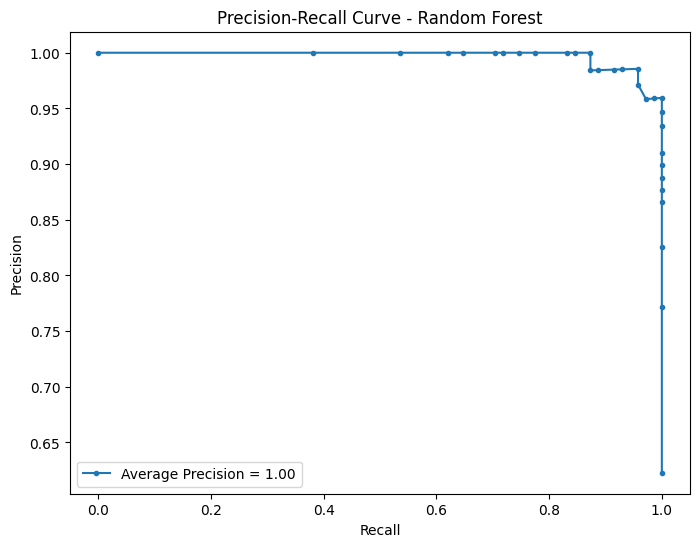

In [32]:
# Q-43. Train a Random Forest Classifier and plot the Precision-Recall curve.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'Average Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.show()


In [33]:
# Q-44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=5000, random_state=42))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=5000, random_state=42)
)
stack_model.fit(X_train, y_train)

y_pred_stack = stack_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print("Stacking Classifier Accuracy:", accuracy_stack)

for name, model in estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Stacking Classifier Accuracy: 0.9649122807017544
rf Accuracy: 0.9649
lr Accuracy: 0.9561


In [34]:
# Q-45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

bootstrap_fractions = [0.5, 0.7, 1.0]

for frac in bootstrap_fractions:
    bag_model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=frac,
        bootstrap=True,
        random_state=42
    )
    bag_model.fit(X_train, y_train)
    y_pred = bag_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bootstrap Fraction: {frac}, Mean Squared Error: {mse:.4f}")


Bootstrap Fraction: 0.5, Mean Squared Error: 0.2664
Bootstrap Fraction: 0.7, Mean Squared Error: 0.2638
Bootstrap Fraction: 1.0, Mean Squared Error: 0.2573
